In [2]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)



                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [11]:
kat = finesse.kat()
kat.verbose=True
kat.parse("""


l L0 10 0 n1                          #laser 1W
tem L0 0 0 1 0                         #tem modes m=1
tem L0 0 1 1 0 
s gap01 1 n1 n2                         #space b/w mod and laser  


mod sb1 55.5556M 0.8 1 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 refl                     #space b/w mod and PRM      ---> REFL <---

m ITM 0.98997 0.01 0 refl n12              #ITM
s ARM 3.3 n12 b5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 b5 b6           #ETM


cav cavity ITM n12 ETM b5

attr ETM Rc 11.30m
attr ETM xbeta 0 
attr ITM xbeta 0 

s gap03 0.1 b6 b7

pd1 trans_I 55.5556M 0 b7              # REFL I quad 1f
pd1 trans_Q 55.5556M 90 b7             # REFL Q quad 1f
pd trans b7
pdtype trans_I x-split
pdtype trans_Q x-split
maxtem 2

set err trans re 
lock z $err 3000 10n 
put ETM phi $z 


xaxis ITM xbeta lin 0 0.8m 800
#xaxis ETM xbeta lin 0 0.8m 8000 
""")

Parsing `tem L0 0 0 1 0` into pykat object not implemented yet, added as extra line.
Parsing `tem L0 0 1 1 0` into pykat object not implemented yet, added as extra line.
Parsing `set err trans re` into pykat object not implemented yet, added as extra line.


--------------------------------------------------------------
Running kat - Started at 2022-06-16 16:31:16.106049


100% | ETA:  0:00:00 | Calculating                                             

Used Finesse None at C:\Users\Parivesh\anaconda3\envs\finesse\Library\bin\kat.exe

Finished in 3.63854 seconds

--- Output info ---

Run date and time: 2022-06-16 16:31:16.108629
Detectors used: trans, trans_I, trans_Q, z

One xaxis used: ['xaxis ITM xbeta lin 0 0.0008 800']
trans_I : min = -6.523708193566080e-11 max = 3.482021884646150e-11
trans_Q : min = 0.000000000000000e+00 max = 9.546503547552729e-11
trans   : min = 9.882911933592831e-07 max = 9.889110183785080e-07
z       : min = 1.331381419613250e+115 max = 1.331381419613250e+115


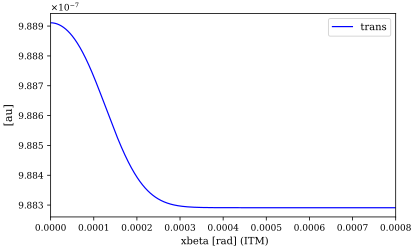

In [12]:
out = kat.run()
out.info()
out.plot(['trans'])

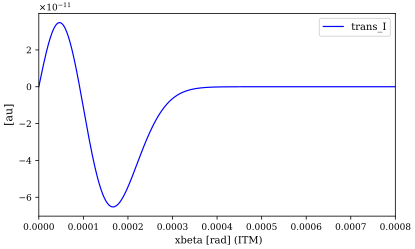

In [13]:
out.plot(['trans_I'])

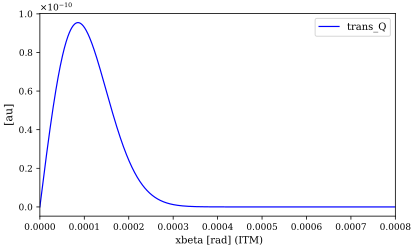

In [14]:
out.plot(['trans_Q'])